## 说明
1. 模型：随机森林分类器
2. 自变量：物种组成
3. 因变量：age_group分类

In [ ]:
# 1.数据读取
import pandas as pd
from sklearn import preprocessing
## 物种组成变量
df = pd.read_csv("sub_sp.csv",sep=",",header=0,index_col=5)
df.drop(columns=["Kindom","Phylum","Class","Order","Family"],inplace=True)
df_X = df.T
## 样本的age_group标签
df = pd.read_csv("sub_meta.csv",sep=",",header=0)
df_y = df[['sample', 'age_group']]
df_y.set_index('sample',inplace=True)

In [15]:
# 2.先划分数据集，再进行特征筛选
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import numpy as np
## 2.1 划分数据集
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
## 2.2 特征筛选
### 2.2.1 方差过滤(默认删除方差为0的特征)
selector = VarianceThreshold()
X_train1 = selector.fit_transform(X_train)
X_test1 = selector.fit_transform(X_test)

# 方差中位数过滤
# x_varmd = VarianceThreshold(np.median(df_X.var().values)).fit_transform(df_X)
print(df_X.shape)
print(x_var0.shape)
print(x_varmd.shape)

(2000, 1755)
(2000, 902)
(2000, 877)


In [2]:
# 1.数据准备
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 加载数据集
data = load_iris()
X, y = data.data, data.target
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 2.选择模型
## 2.1 随机森林
from sklearn.ensemble import RandomForestClassifier

# 创建模型实例
model = RandomForestClassifier()

In [4]:
# 3.训练模型
model.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
# 4. 超参数调优
from sklearn.model_selection import GridSearchCV

# 定义超参数网格
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'criterion': ["gini", "entropy"]
}

# 创建网格搜索实例
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# 进行超参数调优, grid_search.fit()会自动进行交叉验证和模型评估, 并返回最佳模型
grid_search.fit(X_train, y_train)

# 输出最佳超参数和最佳模型
print("Best score: ", grid_search.best_score_)
print("Best index: ", grid_search.best_index_)
print("Best parameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)


Best score:  0.9583333333333334
Best index:  10
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
Best model:  RandomForestClassifier(criterion='entropy', n_estimators=50)


In [6]:
# 5.模型评估
from sklearn.metrics import accuracy_score

# 使用测试集评估模型
predictions = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [7]:
# 6.模型保存，训练好的模型可以持久化存储，以便后续使用
import joblib

# 保存模型
# joblib.dump(grid_search, 'model.pkl')

# 加载模型
loaded_model = joblib.load('model.pkl')

In [10]:
# 7.模型预测
import numpy as np
# 输入的测试数据
x_value = [6.1, 2.8, 4.7, 1.2]
x_value_array = np.array([x_value])
print(x_value)
y_pred = loaded_model.predict(x_value_array)
print(y_pred)

[6.1, 2.8, 4.7, 1.2]
[1]


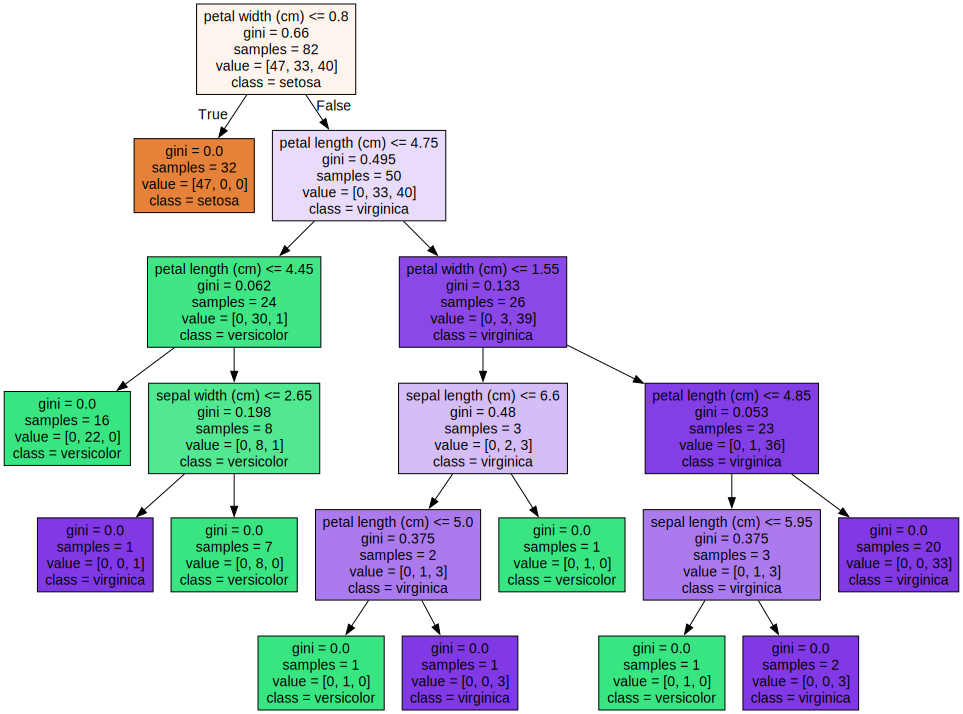

In [11]:
# 7.模型解释和可视化，用来理解模型的决策过程
from sklearn.tree import export_graphviz
import graphviz

# 可视化决策树（以决策树模型为例）
tree = model.estimators_[0]
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=data.feature_names, 
                class_names=data.target_names, 
                filled=True)

# 使用Graphviz渲染可视化
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
df = pd.read_csv("sub_sp.csv",sep=",",header=0,index_col=5)
df.drop(columns=["Kindom","Phylum","Class","Order","Family"],inplace=True)
df.head()
scaler = preprocessing.StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled
